In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
TrainSet = np.loadtxt('C:/EEGProblem/DNN/pytorch_udemy/data/train_data.csv',dtype=np.float32,delimiter=',')
TrainSet = torch.from_numpy(TrainSet)
print(TrainSet.shape[0])
                        
TrainLabels = np.loadtxt('C:/EEGProblem/DNN/pytorch_udemy/data/train_labels.csv',dtype=np.float32,delimiter=',') 
TrainLabels = torch.from_numpy(TrainLabels)

TestSet = np.loadtxt('C:/EEGProblem/DNN/pytorch_udemy/data/test_data.csv',dtype=np.float32,delimiter=',')
TestSet = torch.from_numpy(TestSet)
print(TrainSet.shape[0])
                        
TestLabels = np.loadtxt('C:/EEGProblem/DNN/pytorch_udemy/data/test_labels.csv',dtype=np.float32,delimiter=',') 
TestLabels = torch.from_numpy(TestLabels)


2000
2000


In [3]:
BatchSize = 500;
NumWindow = 1;
NumIters = 5000;
NumEpochs = int(NumIters/(len(TrainSet)/BatchSize));
print(BatchSize,NumWindow,TestSet.shape[1])

500 1 50


In [4]:
TrainLoader = torch.utils.data.DataLoader(dataset = TrainSet,
                                    batch_size = BatchSize,
                                    shuffle = False);
print(TrainLoader.dataset.shape)                                    

torch.Size([2000, 1000])


In [5]:
LabelLoader = torch.utils.data.DataLoader(dataset = TrainLabels,
                                        batch_size = BatchSize,
                                        shuffle = False);

In [6]:
class FeedForwardModel(nn.Module):
    def __init__(self,InputSize,HiddenSize1,HiddenSize2,HiddenSize3,HiddenDim4,HiddenDim5,HiddenDim6,
                 HiddenDim7,OutputSize):
        super(FeedForwardModel,self).__init__()
        self.fc1 = nn.Linear(InputDim,HiddenDim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(HiddenDim1,HiddenDim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(HiddenDim2,HiddenDim3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(HiddenDim3,HiddenDim4)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(HiddenDim4,HiddenDim5)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(HiddenDim5,HiddenDim6)
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(HiddenDim6,HiddenDim7)
        self.relu7 = nn.ReLU()        
        self.fc8 = nn.Linear(HiddenDim7,OutputDim)


    def forward(self,x):
        output = self.fc1(x)
        output = self.relu1(output)
        output = self.fc2(output)
        output = self.relu2(output)
        output = self.fc3(output)
        output = self.relu3(output)        
        output = self.fc4(output)
        output = self.relu4(output)        
        output = self.fc5(output)
        output = self.relu5(output)        
        output = self.fc6(output)    
        output = self.relu6(output)  
        output = self.fc7(output)    
        output = self.relu7(output)    
        output = self.fc8(output)                              
        return output



In [7]:
InputDim = TrainSet.shape[0];
OutputDim = TrainLabels.shape[0];
HiddenDim1 = 50; 
HiddenDim2 = 50;
HiddenDim3 = 50;
HiddenDim4 = 50; 
HiddenDim5 = 50;
HiddenDim6 = 50;
HiddenDim7 = 50;



model = FeedForwardModel(InputDim,HiddenDim1,HiddenDim2,HiddenDim3,HiddenDim4,HiddenDim5,HiddenDim6,
                 HiddenDim7,OutputDim);
criterion = nn.MSELoss();



learningrate = 0.000001;
optimizer = torch.optim.ASGD(model.parameters(), lr = learningrate,lambd=0, alpha=0.95, t0=10000.0, weight_decay=0.000001)
#optimizer = torch.optim.SGD(model.parameters(), lr = learningrate,weight_decay=0.00001);
#optimizer = torch.optim.ASGD(model.parameters(),lr=learningrate,)
Iter = 0;
error = 0;
testsize = TestSet.shape[1]
print(testsize)

50


In [14]:
#if torch.cuda.is_available():
#    model.cuda()
for iw in range(int(NumWindow)):
  for iter in range(NumIters):
    for i in range((iw-1)*BatchSize,iw*BatchSize):
      #print(len(TrainLabels[:,i]))
      images = Variable(TrainSet[:,i]); # size of (batchsize, n1*n2), so there will be batchsize number of images each of size n1*n2;
      labels = Variable(TrainLabels[:,i]); # size of ten, labels 0 to 9
#      if torch.cuda.is_available():
#        images = Variable(TrainSet[:,i].cuda()); # size of (batchsize, n1*n2), so there will be batchsize number of images each of size n1*n2;
#        labels = Variable(TrainLabels[:,i].cuda()); 
      optimizer.zero_grad();
      outputs = model(images);  # each image is assigned a probability table w.r.f the labels, so there are ten probability assigned to each image, wrt labels 0 to 9.

      loss = criterion(outputs,labels);
      loss.backward();
      optimizer.step()
    Iter += 1;
    if Iter%100 == 0:          
      for i in range(testsize):
        predicted = model(TestSet[:,i]) 
        error += torch.norm(predicted - TestLabels[:,i]);  
      error = error/testsize
      print('iter {} loss {} error {} '.format(Iter,loss.item(),error)) 
  
           

iter 10100 loss 0.08205493539571762 error 2.360386610031128 
iter 10200 loss 0.08169858902692795 error 2.3593976497650146 
iter 10300 loss 0.0813513994216919 error 2.358436107635498 
iter 10400 loss 0.08101191371679306 error 2.357499599456787 
iter 10500 loss 0.08067986369132996 error 2.3565866947174072 
iter 10600 loss 0.0803551897406578 error 2.3556976318359375 
iter 10700 loss 0.08003807812929153 error 2.354832649230957 
iter 10800 loss 0.07972756773233414 error 2.3539888858795166 
iter 10900 loss 0.07942402362823486 error 2.3531689643859863 
iter 11000 loss 0.07912562042474747 error 2.3523685932159424 
iter 11100 loss 0.07883353531360626 error 2.3515870571136475 
iter 11200 loss 0.07854762673377991 error 2.3508265018463135 
iter 11300 loss 0.07826778292655945 error 2.350085496902466 
iter 11400 loss 0.07799383252859116 error 2.3493640422821045 
iter 11500 loss 0.07772556692361832 error 2.348663091659546 
iter 11600 loss 0.07746431976556778 error 2.3479843139648438 
iter 11700 loss 

tensor([-0.0317,  0.0263, -0.0167,  0.0255,  0.1460,  0.1489,  0.1471,  0.1667,
         0.6339,  0.6383,  0.6406,  0.6712], grad_fn=<AddBackward0>)
tensor([-0.2324, -1.1853,  0.4875,  0.9302,  0.3120,  0.2398,  0.1816,  0.0893,
         0.7200,  0.7037,  0.7181,  0.7093])
[0.62710285 0.63128436 0.6336851  0.661876  ] [0.68524617 0.683569   0.7062778  0.7064562 ]


True

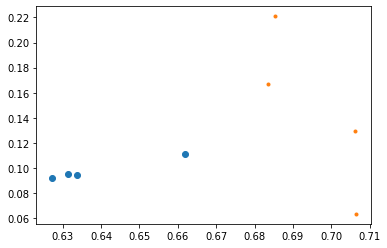

In [15]:
   
poolidx = 32
#model.cpu()
predicted = model(TestSet[:,poolidx])   
#if torch.cuda.is_available():
#    predicted.cpu()
print(predicted)   
print(TestLabels[:,poolidx])     

prediction = predicted.data.numpy()
groundtruth = TestLabels[:,poolidx].data.numpy()
N_Source = int(len(prediction)/3)

Intensity = prediction[0:N_Source]
Theta = prediction[N_Source:2*N_Source]
Radii = prediction[2*N_Source:3*N_Source]

Intensity_Truth = groundtruth[0:N_Source]
Theta_Truth = groundtruth[N_Source:2*N_Source]
Radii_Truth = groundtruth[2*N_Source:3*N_Source]

x_loc = Radii*np.cos(Theta)
y_loc = Radii*np.sin(Theta)
x_loc_truth = Radii_Truth*np.cos(Theta_Truth)
y_loc_truth = Radii_Truth*np.sin(Theta_Truth)

print(x_loc,x_loc_truth)
plt.scatter(x_loc,y_loc,marker="o")
plt.scatter(x_loc_truth,y_loc_truth,marker=".")
PATH = 'C:/EEGProblem/DNN/pytorch_udemy/data/eegmodel2'
torch.save(model, 'C:/EEGProblem/DNN/pytorch_udemy/data/eegmodel2')

torch.cuda.is_available()